<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/detection_and_segmentation/CUSUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSUM
The Cumulative sum (CUSUM) algorithm is a classical technique for monitoring change detection. Change detection refers to procedures to identify abrupt changes in a phenomenon (Basseville and Nikiforov 1993, Gustafsson 2000). By abrupt change it is meant any difference in relation to previous known data faster than expected of some characteristic of the data such as amplitude, mean, variance, frequency, etc.

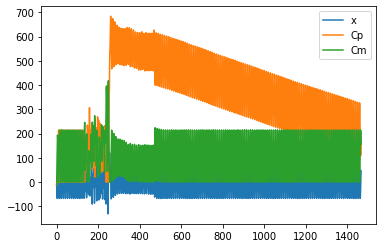

In [2]:
import numpy as np
import pandas as pd
def cusum(x,mean=0,K=0):
    """Tabular CUSUM per Montgomery,D. 1996 "Introduction to Statistical Process Control" p318 
    x    : series to analyze
    mean : expected process mean
    K    : reference value, allowance, slack value-- suggest K=1/2 of the shift to be detected.

    Returns:
    x  Original series
    Cp positive CUSUM
    Cm negative CUSUM
    """
    Cp=(x*0).copy()
    Cm=Cp.copy()
    for ii in np.arange(len(x)):
        if ii == 0:
            Cp[ii]=x[ii]
            Cm[ii]=x[ii]
        else:
            Cp[ii]=np.max([0,x[ii]-(mean+K)+Cp[ii-1]])
            Cm[ii]=np.max([0,(mean-K)-x[ii]+Cm[ii-1]])
    return({'x':x, 'Cp': Cp, 'Cm': Cm})

dat = pd.read_csv('case1.csv').to_numpy()
data=dat[81,:]
pd.DataFrame(cusum(data,K=0.25)).plot()
# pd.DataFrame(cusum(data,K=0.25)).plot()